In [346]:
import pandas as pd

df_ND=pd.read_csv('occupations_avg_wage.csv')
df_ND.head()

,ID Detailed Occupation,Detailed Occupation,Average Wage
0,111021,General & operations managers,78932.012723
1,1110XX,Chief executives & legislators,141283.836459
2,112011,Advertising & promotions managers,68524.377437
3,112020,Marketing & sales managers,88388.284736
4,112021,Marketing managers,84553.351153


In [347]:
df_LD=pd.read_csv('pumas_occupations_num_employees.csv')
df_LD.head()

,puma_id,puma_name,occupation_id,occupation_name,total_population,average_wage
0,79500US1205701,"Tampa City (Central) PUMA, FL",111021,General & operations managers,303,216321.300330
1,79500US1205701,"Tampa City (Central) PUMA, FL",1110XX,Chief executives & legislators,240,15787.429167
2,79500US1205701,"Tampa City (Central) PUMA, FL",112021,Marketing managers,219,44594.771689
3,79500US1205701,"Tampa City (Central) PUMA, FL",112022,Sales managers,427,77892.215457
4,79500US1205701,"Tampa City (Central) PUMA, FL",113012,Administrative services managers,153,30392.915033


In [348]:
valores_unicos_pumaname = df_LD['puma_name'].nunique()
valores_unicos_occupation_name=df_LD['occupation_name'].nunique()

print('PUMA',valores_unicos_occupation_name)
print('OCCUPATION',valores_unicos_pumaname)

PUMA 529
OCCUPATION 2378


In [349]:
merged_data = pd.merge(
    df_LD,
    df_ND,
    left_on="occupation_id",
    right_on="ID Detailed Occupation",
    how="inner"
).rename(columns={'Average Wage': 'national_average_wage', 'average_wage': 'local_average_wage'})

merged_data = merged_data.drop(columns=['ID Detailed Occupation'])
merged_data =merged_data.drop(columns=['Detailed Occupation'])



In [350]:
location_avg_wage = merged_data.groupby('puma_id')['local_average_wage'].mean().reset_index(name='location_average_wage')

df_LAW = merged_data.merge(location_avg_wage, on='puma_id')

df_LAW.head()


,puma_id,puma_name,occupation_id,occupation_name,total_population,local_average_wage,national_average_wage,location_average_wage
0,79500US1205701,"Tampa City (Central) PUMA, FL",111021,General & operations managers,303,216321.300330,78932.012723,37060.517655
1,79500US1205701,"Tampa City (Central) PUMA, FL",1110XX,Chief executives & legislators,240,15787.429167,141283.836459,37060.517655
2,79500US1205701,"Tampa City (Central) PUMA, FL",112021,Marketing managers,219,44594.771689,84553.351153,37060.517655
3,79500US1205701,"Tampa City (Central) PUMA, FL",112022,Sales managers,427,77892.215457,106611.873312,37060.517655
4,79500US1205701,"Tampa City (Central) PUMA, FL",113012,Administrative services managers,153,30392.915033,65180.529338,37060.517655


In [351]:
highest_paid_per_puma = df_LAW.loc[df_LAW.groupby('puma_id')['local_average_wage'].idxmax()]

highest_paid_per_puma_sorted = highest_paid_per_puma.sort_values(by='location_average_wage', ascending=False).reset_index(drop=True)
highest_paid_per_puma_sorted.head().reset_index()
highest_paid_per_puma_sorted.to_excel('highest_paid_per_puma.xlsx', index=False)
highest_paid_per_puma_sorted.head()


,puma_id,puma_name,occupation_id,occupation_name,total_population,local_average_wage,national_average_wage,location_average_wage
0,79500US0607504,"Inner Mission & Castro PUMA, CA",291240,Surgeons,217,572399.815668,282720.324022,96420.973134
1,79500US3603810,"Battery Park City, Greenwich Village & Soho PU...",291020,Dentists,220,668644.000000,127707.800538,94839.246750
2,79500US3603807,"Chelsea, Clinton & Midtown Business District P...",1320XX,Other financial specialists,151,668644.026490,98080.728621,91590.648998
3,79500US0608507,"Cupertino, Saratoga Cities & Los Gatos Town PU...",113051,Industrial production managers,122,572399.803279,77305.982431,85380.084584
4,79500US3401403,"Essex County (Northwest) PUMA, NJ",413021,Insurance sales agents,31,645342.838710,53854.686494,84129.644104


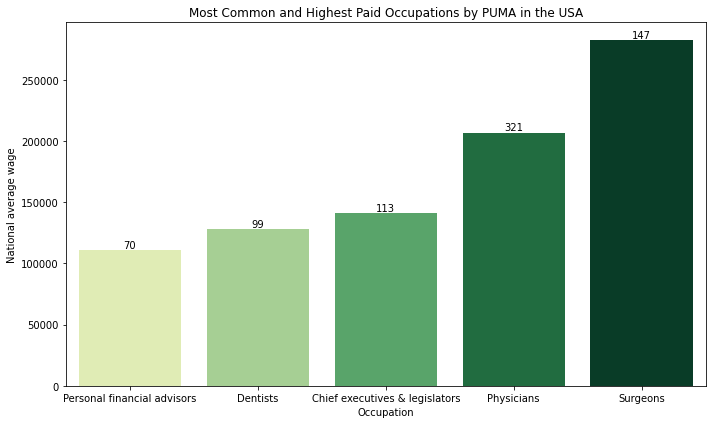

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

df = highest_paid_per_puma_sorted

# Contar las 5 ocupaciones más comunes en las locaciones
top_5_occupations_counts = df['occupation_name'].value_counts().nlargest(5)
top_5_occupations = top_5_occupations_counts.index

# Filtrar el DataFrame para conservar solo las 5 ocupaciones más comunes
top_5_df = df[df['occupation_name'].isin(top_5_occupations)]

# Calcular el salario promedio nacional para las 5 ocupaciones más comunes y ordenar de menor a mayor
national_average_wage_mean = top_5_df.groupby('occupation_name')['national_average_wage'].mean()
national_average_wage_mean = national_average_wage_mean.sort_values(ascending=True)
top_5_occupations_sorted = national_average_wage_mean.index

top_5_occupations_counts = top_5_occupations_counts.reindex(top_5_occupations_sorted)

fig, ax1 = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("YlGn", as_cmap=True)  # Cambia "YlGn" por cualquier nombre de paleta

sns.barplot(x=top_5_occupations_sorted, y=national_average_wage_mean.values, ax=ax1, palette=colors(national_average_wage_mean.rank(pct=True)))
ax1.set_ylabel('National average wage')
ax1.set_xlabel('Occupation')
ax1.set_title('Most Common and Highest Paid Occupations by PUMA in the USA')

# Añadir etiquetas de cantidad de repeticiones sobre cada barra
for i, count in enumerate(top_5_occupations_counts.values):
    ax1.text(i, national_average_wage_mean.values[i] + 0.5, f'{count}', ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


National Average Wage: This axis represents the national average wage of the five most common occupations across various PUMAs (Public Use Microdata Areas). 
Occupation: The horizontal axis displays the five most common occupations across different PUMAs. 
Frequency of Each Occupation: The numbers above each bar show how often each occupation appears across various locations (PUMAs).

This chart enables analysis of the highest-paid occupations in the most representative occupations by PUMAs across the country.


In [353]:
import plotly.express as px

total_population_universe = df_LD['total_population'].sum()
occupation_population = df_LD.groupby('occupation_name').agg(
    total_population=('total_population', 'sum'),
    average_wage=('average_wage', 'mean')  # Agregar el cálculo de salario promedio
).reset_index()

top_30_occupations = occupation_population.sort_values(by='total_population', ascending=False).head(30)
top_30_occupations['population_percentage'] = (top_30_occupations['total_population'] / total_population_universe) * 100
top_30_occupations['occupation_name'] = top_30_occupations['occupation_name'].apply(
    lambda x: '<br>'.join(x.split()) if len(x) > 15 else x
)

# Crear el treemap con salario promedio agregado al texto
fig = px.treemap(
    top_30_occupations,
    path=['occupation_name'],
    values='total_population',
    color='population_percentage', 
    color_continuous_scale='Inferno_r',  # Paleta de colores invertida
    title='Top 30 Occupations by Percentage of Total Population and its national wage by PUMA in the USA ',
    hover_data={'population_percentage': ':.2f', 'average_wage': ':.2f'}
)
fig.data[0].texttemplate = "%{label}<br>%{value:,.0f} (%{customdata[0]:.2f}%)<br>Avg Wage: $%{customdata[1]:,.2f}"
fig.data[0].textfont.size = 12
fig.update_layout(
    width=1000,
    height=700,
    title_font=dict(size=18, color="black"),
    title_x=0.5,
    margin=dict(t=45, l=25, r=25, b=25),
    font=dict(size=20),  
    coloraxis_colorbar=dict(
        title="Population %",
        tickformat=".2f"
    )
)
fig.show()


This chart is a treemap displaying the top 30 occupations by percentage of the total population, enriched with the average wage calculated directly by PUMA information for each occupation. Each rectangle represents an occupation, with its size determined by the total number of people in that occupation, and its color indicating its percentage of the total population.

Dominant Occupations: Occupations with the largest workforce are represented by the largest rectangles.
Wage Comparisons: The average wages associated with each occupation reveal the income distribution within the most representative occupations.
